In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [15]:
samples = np.array([[1,1],[1,2],[2,2],[4,5],[5,5]])

In [16]:
df_sa = pd.DataFrame(samples)

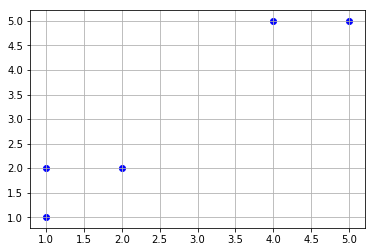

In [18]:
centers = np.array([[1,1.1], [2, 2.1]])

In [176]:
import copy
class K_Means:
    def __init__(self, cluster_num = 2, max_iter = 300, random_state=None):
        self.__cluster_num  = cluster_num
        self.__max_iter     = max_iter
        self.__random_state = random_state
        self.__cluster_centers = None
        if self.__random_state:
            np.random.seed(self.__random_state)

    def _Fit(self, pivots):
        initial = np.random.permutation(pivots.shape[0])[:self.__cluster_num]
        self.__cluster_centers = pivots[initial]
        
        for _ in range(self.__max_iter):
            self.labels_ = np.array([self._GetNearestId(self.__cluster_centers, pivot) for pivot in pivots])
        
            print(self.labels_)
            pivot_by_cluster = [pivots[np.where(self.labels_ == i)] for i in range(self.__cluster_num)]
            self.__cluster_centers = [c.sum(axis=0) / len(c) for c in pivot_by_cluster]

        return(self)

    def _GetNearestId(self, centers, pivot):

        distance = self._Distance(centers, pivot)
        min_id = np.argmin(distance)
        return(min_id)
        #return(min_id, distance[min_id])
    
    def _Distance(self, centers, pivot):
        distance = np.sqrt(((pivot - centers)**2).sum(axis=1))
        return(distance)

    def _GetCenters(self):
        return(self.__cluster_centers)
        
    def _GetLabels(self):
        return(self.labels_)


In [177]:
kmeans = K_Means(cluster_num = 2, max_iter = 5, random_state=1)

In [178]:
x = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
init = np.random.permutation(x.shape[0])[:2]
print(init)
print(x[init])

[2 1]
[[3 3]
 [2 2]]


In [179]:
kmeans._Fit(samples)
#nearest = kmeans._Nearest(centers, samples[0])
#nearest = kmeans._GetNearestId(np.array([[1,2],[2,2]]), np.array([1,1]))


[0 0 1 1 1]
[0 0 0 1 1]
[0 0 0 1 1]
[0 0 0 1 1]
[0 0 0 1 1]


In [182]:
cluster_centers = kmeans._GetCenters()
cluster_centers

[array([1.33333333, 1.66666667]), array([4.5, 5. ])]

In [181]:
point_labels = kmeans._GetLabels()
point_labels

array([0, 0, 0, 1, 1])

In [189]:
df_sa = pd.DataFrame(samples)
df_ce = pd.DataFrame(cluster_centers)

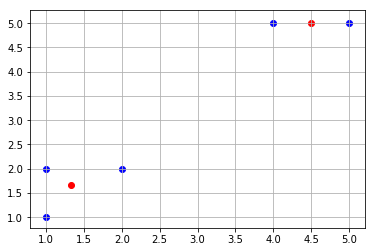

In [190]:
plt.grid()
plt.scatter(df_sa[0], df_sa[1], c="blue")
plt.scatter(df_ce[0], df_ce[1], c="r")